#QUESTION 1


# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', index_col='user_id')

# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()

# Step 5: Discover the Male ratio per occupation and sort it
male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(lambda x: (x == 'M').sum() / x.count()).sort_values(ascending=False)

# Step 6: For each occupation, calculate the minimum and maximum ages
min_max_ages_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

# Step 8: For each occupation, present the percentage of women and men
gender_percentage_per_occupation = users.groupby(['occupation', 'gender']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Displaying the results
print("Mean age per occupation:")
print(mean_age_per_occupation)
print("\nMale ratio per occupation:")
print(male_ratio_per_occupation)
print("\nMinimum and Maximum ages per occupation:")
print(min_max_ages_per_occupation)
print("\nMean age per occupation and sex:")
print(mean_age_per_occupation_sex)
print("\nPercentage of women and men per occupation:")
print(gender_percentage_per_occupation)


#QUESTION 2

# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goal_column = euro12['Goals']

# Step 5: How many teams participated in the Euro2012?
num_teams = euro12['Team'].nunique()

# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]

# Step 7: View only the columns Team, Yellow Cards, and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8: Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()

# Step 10: Filter teams that scored more than 6 goals
teams_more_than_six_goals = euro12[euro12['Goals'] > 6]

# Step 11: Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

# Step 12: Select the first 7 columns
first_seven_columns = euro12.iloc[:, :7]

# Step 13: Select all columns except the last 3
all_columns_except_last_three = euro12.iloc[:, :-3]

# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
selected_teams = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

# Displaying the results
print("Goal column:")
print(goal_column)
print("\nNumber of teams participated in Euro2012:", num_teams)
print("\nNumber of columns in the dataset:", num_columns)
print("\nDiscipline dataframe:")
print(discipline)
print("\nDiscipline dataframe sorted:")
print(discipline_sorted)
print("\nMean Yellow Cards given per team:", mean_yellow_cards)
print("\nTeams that scored more than 6 goals:")
print(teams_more_than_six_goals)
print("\nTeams starting with G:")
print(teams_starting_with_G)
print("\nFirst 7 columns:")
print(first_seven_columns)
print("\nAll columns except the last 3:")
print(all_columns_except_last_three)
print("\nShooting Accuracy from England, Italy, and Russia:")
print(selected_teams)


#QUESTION 3


# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100), name='bedrs')
series2 = pd.Series(np.random.randint(1, 4, size=100), name='bathrs')
series3 = pd.Series(np.random.randint(10000, 30001, size=100), name='price_sqr_meter')

# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

# Step 4: Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0)

# Step 6: Check the length of 'bigcolumn'
print("Length of bigcolumn:", len(bigcolumn))

# Step 7: Reindex the DataFrame so it goes from 0 to 299
df = df.reset_index(drop=True)

# Displaying the results
print("DataFrame:")
print(df)
print("\nbigcolumn:")
print(bigcolumn)


#QUESTION 4


# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "wind.txt"
data = pd.read_csv(url, sep='\s+', parse_dates=[[0, 1, 2]])

# Step 3: Replace the first 3 columns by a proper datetime index
data.set_index('Yr_Mo_Dy', inplace=True)

# Step 4: Create a function to fix the year
def fix_year(year):
    if year > 2000:
        year -= 100
    return year

# Apply the function to fix the year
data.index = data.index.map(lambda x: pd.Timestamp(year=fix_year(x.year), month=x.month, day=x.day))

# Step 5: Set the right dates as the index
data.index = pd.to_datetime(data.index)

# Step 6: Compute how many values are missing for each location
missing_per_location = data.isnull().sum()

# Step 7: Compute how many non-missing values there are in total
total_non_missing_values = data.notnull().sum().sum()

# Step 8: Calculate the mean windspeeds over all locations and times
mean_windspeed = data.mean().mean()

# Step 9: Create loc_stats DataFrame and calculate min, max, mean, and std
loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Step 10: Create day_stats DataFrame and calculate min, max, mean, and std
day_stats = data.resample('D').agg(['min', 'max', 'mean', 'std'])

# Step 11: Find the average windspeed in January for each location
average_january_windspeed = data[data.index.month == 1].mean()

# Step 12: Downsample to a yearly frequency
yearly_data = data.resample('Y').mean()

# Step 13: Downsample to a monthly frequency
monthly_data = data.resample('M').mean()

# Step 14: Downsample to a weekly frequency
weekly_data = data.resample('W-Mon').mean()

# Step 15: Calculate min, max, mean, and std for each week for the first 52 weeks
weekly_stats_first_52_weeks = data.resample('W-Mon').agg(['min', 'max', 'mean', 'std']).head(52)

# Displaying the results
print("Missing values per location:")
print(missing_per_location)
print("\nTotal non-missing values:", total_non_missing_values)
print("\nMean windspeed over all locations and times:", mean_windspeed)
print("\nLocation statistics:")
print(loc_stats)
print("\nDay statistics:")
print(day_stats)
print("\nAverage windspeed in January for each location:")
print(average_january_windspeed)
print("\nYearly downsampling:")
print(yearly_data)
print("\nMonthly downsampling:")
print(monthly_data)
print("\nWeekly downsampling:")
print(weekly_data)
print("\nWeekly statistics for the first 52 weeks:")
print(weekly_stats_first_52_weeks)


#QUESTION 5


# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 3: Assign it to a variable called chipo
# (Already done in the previous step)

# Step 4: See the first 10 entries
print("First 10 entries:")
print(chipo.head(10))

# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("\nNumber of observations:", num_observations)

# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("\nNumber of columns:", num_columns)

# Step 7: Print the name of all the columns
print("\nColumn names:")
print(chipo.columns)

# Step 8: How is the dataset indexed?
print("\nIndexing:")
print(chipo.index)

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("\nMost-ordered item:", most_ordered_item)

# Step 10: For the most-ordered item, how many items were ordered?
num_items_ordered = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nNumber of items ordered for the most-ordered item:", num_items_ordered)

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("\nMost-ordered item in the choice_description column:", most_ordered_choice)

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("\nTotal items ordered:", total_items_ordered)

# Step 13:
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))  # Removing dollar sign and converting to float
print("\nChecking item price type after conversion:", chipo['item_price'].dtype)

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nRevenue for the period:", revenue)

# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("\nNumber of orders made:", num_orders)

# Step 16: What is the average revenue amount per order?
avg_revenue_per_order = revenue



#QUESTION 6

import pandas as pd
import matplotlib.pyplot as plt


file_path = "us-marriages-divorces-1867-2014.csv"  
df = pd.read_csv(file_path)

# Step 2: Create a line plot
plt.figure(figsize=(10, 6))

# Check the actual column names in OUr DataFrame and use them in the plot
plt.plot(df['Year'], df['Marriages'], label='Marriages per Capita')
plt.plot(df['Year'], df['Divorces'], label='Divorces per Capita')

# Step 3: Label the axes and add a legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita (1867-2014)')
plt.legend()

# Step 4: Show the plot
plt.show()


#QUESTION 7

import pandas as pd
import matplotlib.pyplot as plt


file_path = "us-marriages-divorces-1867-2014.csv"  
df = pd.read_csv(file_path)

# Filter data for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
df_selected_years = df[df['Year'].isin(selected_years)]

# Create a vertical bar chart
plt.figure(figsize=(10, 6))

# Plot marriages and divorces per capita for selected years
bar_width = 0.35
bar_positions_marriages = df_selected_years['Year'] - bar_width / 2
bar_positions_divorces = df_selected_years['Year'] + bar_width / 2

plt.bar(bar_positions_marriages, df_selected_years['Marriages'], width=bar_width, label='Marriages per Capita')
plt.bar(bar_positions_divorces, df_selected_years['Divorces'], width=bar_width, label='Divorces per Capita')

# Label the axes and add a legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Number of Marriages and Divorces per Capita (1900, 1950, 2000)')
plt.legend()

# Show the plot
plt.show()


In [34]:

#QUESTION 8

# Print the column names in your dataset
print(df.columns)


Index(['Actor', 'Count'], dtype='object')


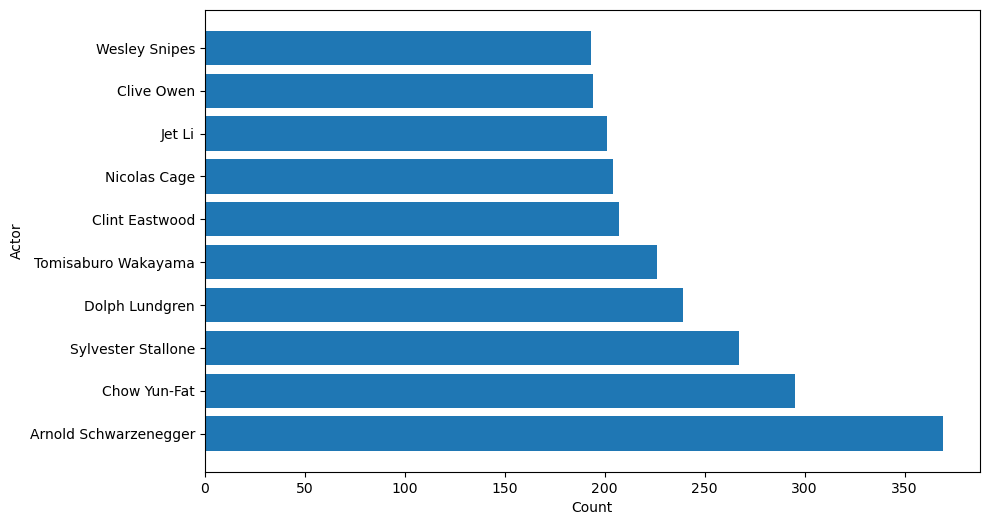

In [38]:
# Sort the DataFrame by the 'Count' column in descending order
df = df.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Actor'], df['Count'])

# Label the axes
plt.xlabel('Count')
plt.ylabel('Actor')

# Display the plot
plt.show()


# QUESTION 9

import pandas as pd
import matplotlib.pyplot as plt


file_path = 'roman-emperor-reigns.csv'
df = pd.read_csv(file_path)

# Count the occurrences of each cause of death
death_counts = df['Cause_of_Death'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(death_counts, labels=death_counts.index, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to be equal to ensure a circular pie chart
plt.axis('equal')

# Add a title
plt.title('Distribution of Roman Emperors\' Cause of Death')

# Display the pie chart
plt.show()


In [44]:
# Print column names to identify the correct ones
print(df.columns)


Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')


#QUESTION 10

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'arcade-revenue-vs-cs-doctorates.csv'
df = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', data=df, palette='viridis', s=100)

# Set labels for the axes
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Add a title
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')

# Display the legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
